# UDLA
## Assessment 11-mar-2024

# Instrucciones

Para este ejercicio, vamos a trabajar con dos data sets, uno relacionado a estudiantes (estudiantes.csv), y otro relacionado a carreras (carreras.csv).

El set de datos estudiantes.csv contiene:
- id: identificador único de la persona
- genero: Género de la persona
- fecha_nacimiento: de la persona 
- periodo_inicio: Fecha de inicio clases de la persona en su primer periodo académico
- avance_malla: qué % ha avanzado la persona en su malla académica 
- gpa: Rendimiento en notas promedio de la persona.

El set de datos carreras.csv contiene:
- id: identificador de la persona
- carrera: nombre de la carrera a la que está inscrito
- facultad: nombre de la facultd a la que está inscrito
- campus:  nombre del campus en el que la persona recibe clases

Las preguntas del ejercicio se muestran en celdas de texto (markdown) y las respuestas se deben escribir en celdas de código marcadas con el comentario: **# Escriba el código aquí**.

Para cada pregunta, se debe escribir el código necesario para obtener la respuesta y en caso de requerirlo, se deberá escribir una respuesta corta como comentario en la celda de código.

Puede hacer uso de IA, y lenguajes de programación como R o Python para la resolución de este ejercicio. 

---

# EJEMPLO

Importe las librerías necesarias:

```python
import pandas as pd
```
¿Cuánto es el precio promedio?

```python
df = pd.read_csv('airbnb.csv')
df['price'].mean()

# Respuesta: El precio promedio es de 152.72
```

etc. 


---

# Assessment


### Nombre: Diego Armando Vallejo Vinueza

# PARTE 1 - Importación y limpieza de datos

- 1 - Importe las librerías para trabajar con datos, visualizaciones y modelamiento.

In [115]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



- 2 - Importar los datos desde su ordenador y guardarlos en como `df_estudiantes` y `df_carreras`.

      - Tomar en cuenta que es un archivo tipo csv.

In [116]:
import pandas as pd

# Leer los archivos CSV con UTF-8 encoding
df_estudiantes = pd.read_csv('estudiantes.csv', encoding='utf-8')
df_carreras = pd.read_csv('carreras.csv', encoding='utf-8')


# PARTE 2 - Limpieza y manejo de datos

- 3 - Cree un objeto nuevo llamado `data` a partir de  `df_estudiantes` y `df_carreras`. Considere la informacion proporcionada para crear la union correctamente.

In [142]:
# Unir los dataframes utilizando la columna 'id'
data = pd.merge(df_estudiantes, df_carreras, on='id', how='inner')
data


,Numero_x,id,genero,edad,periodo_inicio,avance_malla,gpa,Numero_y,carrera,facultad,campus
0,3151,200170301519080,M,43,2022-03,30.56,91.0,0,INGENIERÍA DE SISTEMAS,Facultad de Ciencias e Ingenierias,A
1,3152,200201006419089,F,43,2020-03,93.94,86.0,1,INGENIERÍA DE SISTEMAS,Facultad de Ciencias e Ingenierias,D
2,3153,20053001013219096,M,37,2023-03,22.22,84.0,2,INGENIERÍA DE SISTEMAS,Facultad de Ciencias e Ingenierias,A
3,3154,20061001033019103,F,35,2021-03,78.79,92.0,3,INGENIERÍA DE SISTEMAS,Facultad de Ciencias e Ingenierias,D
4,3155,20071001022119105,M,37,2023-02,36.11,84.0,4,INGENIERÍA DE SISTEMAS,Facultad de Ciencias e Ingenierias,A
...,...,...,...,...,...,...,...,...,...,...,...
6718,14930,20230126420103120,M,17,2023-02,4.08,NaN,6718,ODONTOLOGÍA,Facultad de Ciencias de la Salud,D
6719,14931,20230126828103122,F,18,2023-02,2.04,83.0,6719,ODONTOLOGÍA,Facultad de Ciencias de la Salud,E
6720,14932,20230126866103124,M,21,2023-02,4.08,81.0,6720,ODONTOLOGÍA,Facultad de Ciencias de la Salud,E
6721,14933,20230127416103126,M,17,2023-02,2.04,95.0,6721,ODONTOLOGÍA,Facultad de Ciencias de la Salud,I


In [143]:
# Verificar si hay valores faltantes en el conjunto de datos
print("Valores faltantes en el conjunto de datos:")
print(data.isnull().sum())

Valores faltantes en el conjunto de datos:
Numero_x           0
id                 0
genero             0
edad               0
periodo_inicio     0
avance_malla       0
gpa               84
Numero_y           0
carrera            0
facultad           0
campus             0
dtype: int64


In [118]:
# Limpiar el DataFrame data de filas duplicadas y valores faltantes
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
from sklearn.impute import SimpleImputer

# Crear un objeto SimpleImputer para imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a tus datos
X_imputed = imputer.fit_transform(X)

# Continuar con tu código de clustering y evaluación del silhouette score

print(data.isnull().sum())

Numero_x          0
id                0
genero            0
edad              0
periodo_inicio    0
avance_malla      0
gpa               0
Numero_y          0
carrera           0
facultad          0
campus            0
dtype: int64


- 4 - Filtre el objeto `data` para conservar únicamente a las personas que estudian en la "Facultad de Ciencias de la Salud"

In [119]:
# Escriba el código aquí
data_fcs = data[data['facultad'] == 'Facultad de Ciencias de la Salud']


Número de outliers: 9


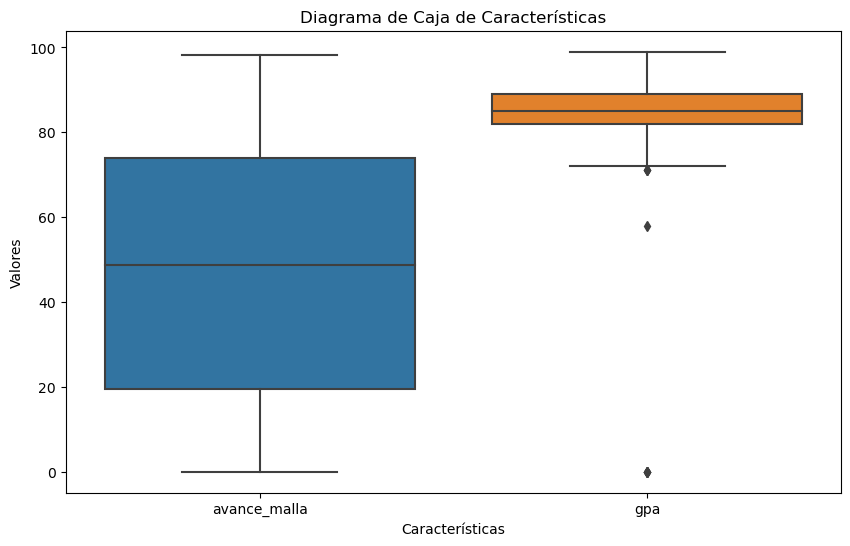

In [120]:
import seaborn as sns

# Seleccionar las características numéricas para analizar
features = ['avance_malla', 'gpa']

# Crear un DataFrame combinando los datos de estudiantes y carreras
data = pd.merge(df_estudiantes, df_carreras, on='id', how='inner')

# Filtrar datos de la Facultad de Ciencias de la Salud
data_salud = data[data['facultad'] == 'Facultad de Ciencias de la Salud']

# Crear un subconjunto de datos solo con las características seleccionadas
data_subset = data_salud[features]

# Calcular los percentiles 25 y 75 para cada característica
Q1 = data_subset.quantile(0.25)
Q3 = data_subset.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites inferiores y superiores para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers usando los límites
outliers = ((data_subset < lower_bound) | (data_subset > upper_bound)).any(axis=1)

# Mostrar los outliers
print("Número de outliers:", outliers.sum())

# Crear un diagrama de caja para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_subset)
plt.title('Diagrama de Caja de Características')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.show()

# PARTE 3 - Visualización

En adelante, utilice el objeto `data`. Las conclusiones serán relacionadas a la FACULTAD DE SALUD.

- 5 - Cree una representación gráfica que muestre el total de estudiantes por carrera. Puede usar gráfico de barras o pastel.

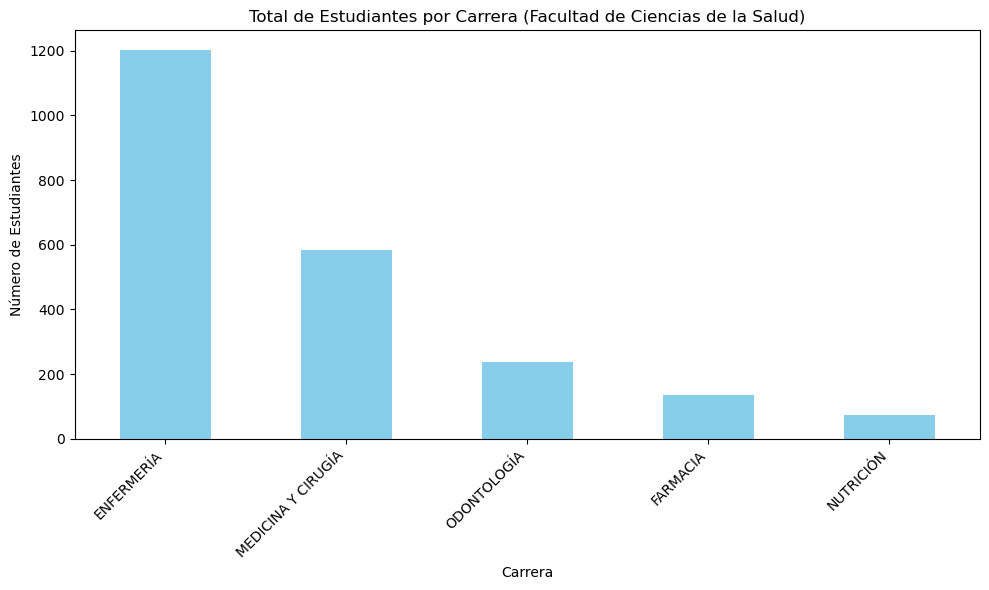

In [121]:
# Escriba el códig# Contar el número de estudiantes por carrera
estudiantes_por_carrera = data[data['facultad'] == 'Facultad de Ciencias de la Salud']['carrera'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
estudiantes_por_carrera.plot(kind='bar', color='skyblue')
plt.title('Total de Estudiantes por Carrera (Facultad de Ciencias de la Salud)')
plt.xlabel('Carrera')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- 6 Cree al menos una representación gráfica que muestre insights valiosos sobre los datos disponibles. Tiene libertad de mostrar lo que le parezca más relevante.

    Pista: Por ejemplo, la correlación entre el avance de malla y el GPA por carrera.

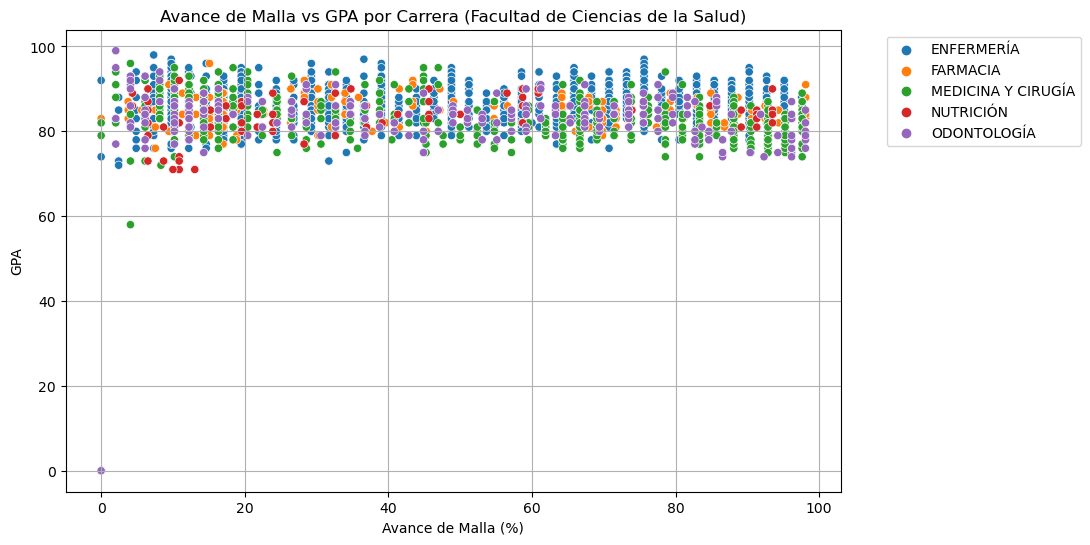

In [122]:
# Escriba el código aquí
# Crear un diagrama de dispersión de avance de malla vs GPA, diferenciando por carrera
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avance_malla', y='gpa', hue='carrera', data=data[data['facultad'] == 'Facultad de Ciencias de la Salud'])
plt.title('Avance de Malla vs GPA por Carrera (Facultad de Ciencias de la Salud)')
plt.xlabel('Avance de Malla (%)')
plt.ylabel('GPA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

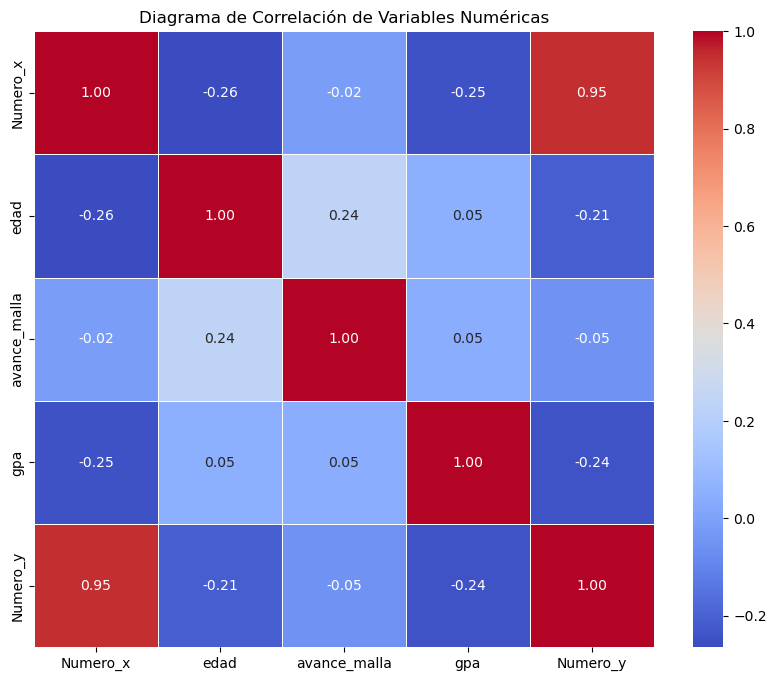

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
numeric_vars = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numeric_vars.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Generar el diagrama de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Diagrama de Correlación de Variables Numéricas')
plt.show()


# PARTE 4 - Modelamiento

- 7 - Encuentre el número de clusters óptimo para el conjunto de datos `data`. Puede usar un gráfico de elbow o el silhouette score. Interprete lo que encontró.

Valores faltantes en el conjunto de datos:
Numero_x          0
id                0
genero            0
edad              0
periodo_inicio    0
avance_malla      0
gpa               0
Numero_y          0
carrera           0
facultad          0
campus            0
cluster           0
dtype: int64


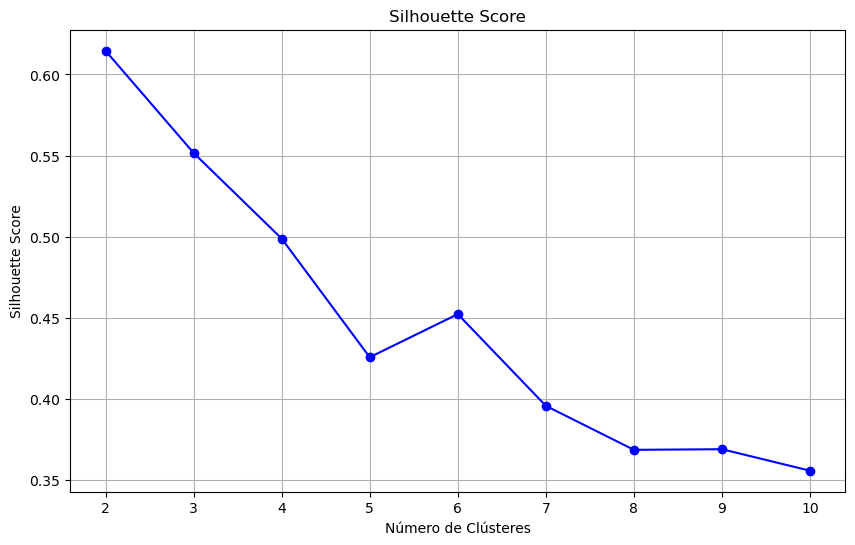

In [137]:
from sklearn.impute import SimpleImputer

# Crear un objeto SimpleImputer para imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a la característica 'gpa'
data['gpa'] = imputer.fit_transform(data[['gpa']])


from sklearn.impute import SimpleImputer

# Identificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes en el conjunto de datos:")
print(missing_values)

# Crear un objeto SimpleImputer para imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a tus datos
X_imputed = imputer.fit_transform(X)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleccionar las características para clustering
X = data[['avance_malla', 'gpa']]

# Lista para almacenar los valores de silhouette score
silhouette_scores = []

# Probar un número de clústeres desde 2 hasta 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Calcular el silhouette score después de ajustar el modelo
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Graficar el silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()



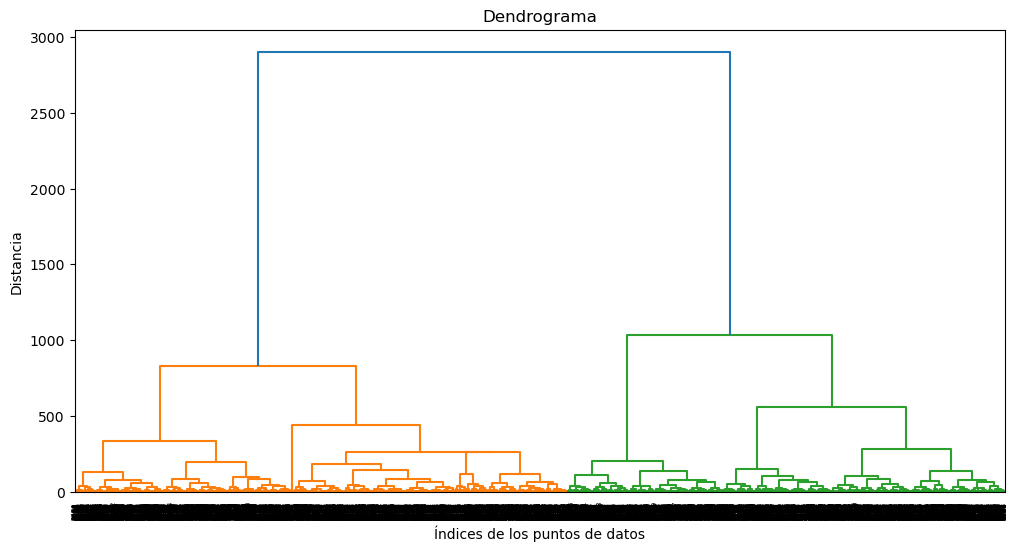

In [147]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Calcular la matriz de distancias
distances = sch.distance.pdist(X_imputed)

# Calcular el enlace
linkage = sch.linkage(distances, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrograma')
plt.xlabel('Índices de los puntos de datos')
plt.ylabel('Distancia')
plt.show()


- 8 - Realice un modelo de clasificación con las variables que considere más relevantes para el número de clusters encontrados en el apartado anterior.

In [139]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar las características para clustering
X_all = data[['avance_malla', 'gpa']]

# Aplicar KMeans para encontrar los clusters en todos los datos
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_all = kmeans.fit_predict(X_all)

# Agregar los clusters al DataFrame original
data['cluster'] = clusters_all

# Seleccionar las características para el modelo de clasificación solo para la Facultad de Ciencias de la Salud
X = data[data['facultad'] == 'Facultad de Ciencias de la Salud'][['avance_malla', 'gpa']]
y = data[data['facultad'] == 'Facultad de Ciencias de la Salud']['cluster']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Exactitud del modelo: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       232

    accuracy                           1.00       447
   macro avg       1.00      1.00      1.00       447
weighted avg       1.00      1.00      1.00       447



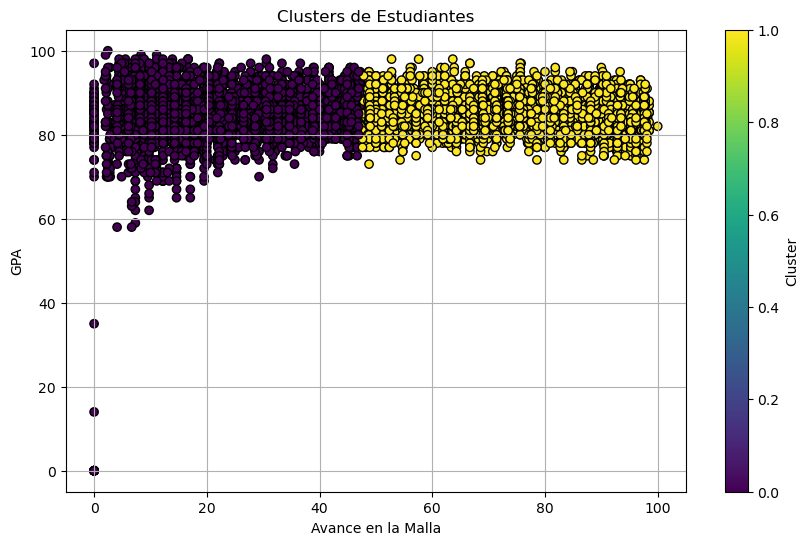

In [140]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_all['avance_malla'], X_all['gpa'], c=clusters_all, cmap='viridis', marker='o', edgecolors='k')
plt.title('Clusters de Estudiantes')
plt.xlabel('Avance en la Malla')
plt.ylabel('GPA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [64]:
# Calcular los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Crear un DataFrame con los centroides y las características correspondientes
centroid_df = pd.DataFrame(centroids, columns=['avance_malla', 'gpa'])

# Asignar un nombre a cada cluster
centroid_df['cluster'] = ['Cluster 0', 'Cluster 1']

# Mostrar el DataFrame de los centroides
print(centroid_df)


   avance_malla        gpa    cluster
0     24.405588  85.402318  Cluster 0
1     76.724497  84.758383  Cluster 1


In [146]:

# Agregar una columna al DataFrame original con el cluster asignado
data_with_cluster = data.copy()
data_with_cluster['cluster'] = clusters_all
print(data_with_cluster)




      Numero_x                 id genero  edad periodo_inicio  avance_malla  \
0         3151    200170301519080      M    43        2022-03         30.56   
1         3152    200201006419089      F    43        2020-03         93.94   
2         3153  20053001013219096      M    37        2023-03         22.22   
3         3154  20061001033019103      F    35        2021-03         78.79   
4         3155  20071001022119105      M    37        2023-02         36.11   
...        ...                ...    ...   ...            ...           ...   
6718     14930  20230126420103120      M    17        2023-02          4.08   
6719     14931  20230126828103122      F    18        2023-02          2.04   
6720     14932  20230126866103124      M    21        2023-02          4.08   
6721     14933  20230127416103126      M    17        2023-02          2.04   
6722     14934  20230127448103128      M    20        2023-02          2.04   

       gpa  Numero_y                 carrera  \
0  

#  PARTE 5 - Presentación de Resultados

- 9 - Junte sus resultados y conclusiones en una presentación (power point) que compartirá ante la audiencia, puede agregar todos los insights que considere oportunos. 
  - En este apartado se tomará en cuenta su habilidad para comunicar resultados, encontrar insights relevantes, demostrar la importancia de los mismos y la utilidad que tendrán para los distintos equipos de la organización.   

Los resultados obtenidos se centran en el análisis de los estudiantes de la Facultad de Ciencias de la Salud, donde se han identificado dos clusters distintos con base en el avance en la malla curricular y el GPA.

### Cluster 0:

**Avance de Malla:** El promedio de avance en la malla curricular para este cluster es de aproximadamente 24.41, lo que indica que los estudiantes en este cluster pueden estar en las etapas iniciales de su programa de estudios.

**GPA:** El promedio de GPA para este cluster es de alrededor de 85.40. Esto sugiere un rendimiento académico sólido entre los estudiantes de este grupo.

### Cluster 1:

**Avance de Malla:** El promedio de avance en la malla curricular para este cluster es significativamente mayor, alrededor de 76.72. Esto indica que los estudiantes en este cluster están más avanzados en su programa de estudios en comparación con el Cluster 0.

***GPA:** Aunque el promedio de GPA para este cluster es similar al Cluster 0, alrededor de 84.76, es importante tener en cuenta que estos estudiantes han avanzado considerablemente en la malla curricular.

Estos resultados sugieren que los estudiantes en el Cluster 0 podrían ser aquellos que recién comienzan su programa de estudios o que están en las etapas iniciales, mientras que los del Cluster 1 podrían ser estudiantes más avanzados en términos de avance en la malla curricular, pero con un rendimiento académico comparable.